<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 9.2: CNN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- A guide you are encouraged to read through is TensorFlow's own tutorial for immage classification, which can be found [here](https://www.tensorflow.org/tutorials/images/cnn)

## CIFAR10 small image classification
- [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset of color training images, labeled over 10 categories.

It has the classes:
- airplane
- automobile
- bird
- cat
- deer
- dog
- frog
- horse
- ship
- truck

## Import libraries

In [ ]:
# Uncomment the statements below if there are problems with TensorFlow on macOS
# import os
# os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [1]:
# insert code here
import tensorflow as tf
import keras
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [66]:
# Uncomment the statement below to allow online monitoring with TensorBoard (need to be installed)
#from keras.callbacks import TensorBoard
from tensorflow.keras import datasets, layers, models
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

Exception: URL fetch failure on https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz: None -- [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1125)

In [4]:
print(keras.__version__)

2.6.0


## Load data
Use the **Keras**' load method.

In [5]:
# insert code here
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [6]:
file = 'D:\IOD Data\image analysis\cifar-10-batches-py/data_batch_1'

In [7]:
data_batch_1 = unpickle(file)
data_batch_1.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [41]:
dir(data_batch_1)

['__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'clear',
 'copy',
 'fromkeys',
 'get',
 'items',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'update',
 'values']

## Check some data

In [46]:
print(data.shape)

(10000, 32, 32, 3)


## Prepare data

In [44]:
# insert code here
data = data_batch_1[b'data']
data = data.reshape(len(data),3, 32, 32).transpose(0, 2, 3, 1)
print(data.shape)

(10000, 32, 32, 3)


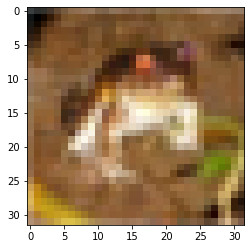

In [45]:
plt.imshow(data[0])

In [10]:
X = data
target = data_batch_1[b'labels']
print(target[0: 4])
y = to_categorical(
    target,
    num_classes = len(set(target)),
    dtype = 'uint8')

[6, 9, 9, 4]


In [47]:
y.shape

(10000, 10)

In [11]:
len(y)

10000

## Create the model's architecture
- **NOTE ALERT**: Take into account the volume of data and parameters. Time and processing escalate quite fast.
- **NOTE ALERT**: It is likely this data will require more complex models.

In [57]:
# insert code here
filter = []

for i in range(len(target) // 10):
    s = set()
    while len(s) < 2:
        s = set(np.random.randint(0, 10, 2, dtype = np.int8))
    a = [x in s for x in range(10)]
    filter.append(a)
test = np.array(filter).flatten()
train = np.array([not t for t in test])

X_train = X
y_train = y

In [58]:
X_train = X[train].copy()
X_test  = X[test].copy()
y_train = y[train].copy()
y_test  = y[test].copy()

In [59]:
print(len(train))

10000


In [60]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [61]:
model.summary()
X_train.shape

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


(8000, 32, 32, 3)

In [62]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(Dense(len(set(target)),
                activation = 'softmax'))

In [63]:
y_train.shape
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_5 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)               

In [64]:
print(y_train.shape)

(8000, 10)


## Compile the model

In [65]:
# insert code here
model.compile(optimizer='adam',
              loss='categorical_crossentropy', #tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test))

Epoch 1/10
250/250 [==============================] - 5s 17ms/step - loss: 2.4142 - accuracy: 0.1978 - val_loss: 1.9361 - val_accuracy: 0.2840
Epoch 2/10
250/250 [==============================] - 4s 16ms/step - loss: 1.7815 - accuracy: 0.3519 - val_loss: 1.7763 - val_accuracy: 0.3630
Epoch 3/10
250/250 [==============================] - 4s 16ms/step - loss: 1.5800 - accuracy: 0.4210 - val_loss: 1.6443 - val_accuracy: 0.4295
Epoch 4/10
250/250 [==============================] - 4s 14ms/step - loss: 1.4316 - accuracy: 0.4856 - val_loss: 1.5727 - val_accuracy: 0.4355
Epoch 5/10
250/250 [==============================] - 4s 15ms/step - loss: 1.3142 - accuracy: 0.5306 - val_loss: 1.5328 - val_accuracy: 0.4715
Epoch 6/10
250/250 [==============================] - 4s 14ms/step - loss: 1.1904 - accuracy: 0.5760 - val_loss: 1.5232 - val_accuracy: 0.4755
Epoch 7/10
250/250 [==============================] - 4s 15ms/step - loss: 1.1034 - accuracy: 0.6039 - val_loss: 1.4901 - val_accuracy: 0.4870

## Fit the training data

In [ ]:
# Uncomment the statement below to allow online monitoring with TensorBoard
# tensorboard = TensorBoard(log_dir = 'logs') # choose or create a directory for the logs


In [ ]:
%%time
# insert code here

# cdgddgcvdgeygdcvdgyegdcvgdeygdcvdgeydgcvdgeygdcvdgeydgcvgdyedgcv
# ..., callbacks = [tensorboard], ...

### TensorBoard
- TensorBoard is TensorFlow's visualisation toolkit. 
- If Tensorflow 2 and Jupyter is installed in the same environment, running the cell below will start TensorBoard within the notebook.
- More information about how to set up TensorBoard can be found [here](https://www.tensorflow.org/tensorboard/tensorboard_in_notebooks)


In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs

## Create predictions

In [68]:
%%time
predictions = model.predict_classes(X_test)

AttributeError: 'Sequential' object has no attribute 'predict_classes'

## Evaluate the model

63/63 - 0s - loss: 1.6734 - accuracy: 0.5015


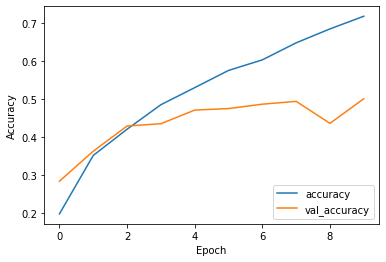

In [73]:
# insert code here
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

## Visualisation of cost

In [84]:
predict_x=model.predict(X_test) 
predictions=np.argmax(predict_x,axis=1)

In [85]:
score = model.evaluate(X_test, y_test, batch_size = 10)
print('\nTest loss: %.6f, Test accuracy: %.6f' % tuple(score))

200/200 [==============================] - 0s 2ms/step - loss: 1.6734 - accuracy: 0.5015

Test loss: 1.673421, Test accuracy: 0.501500


In [86]:
def print_cm(cm):
    d_size = max(len('%d' % cm.max()), len('%d' % cm.shape[1]))
    if min(cm.shape) > 10: # make sparse
        print('Sparse Matrix (*=diagonal)')
        fmt_r = 'r%%0%dd' % d_size
        fmt_c = ', c%%0%dd%%s= %%%dd' % (d_size, d_size)
        for i in range(cm.shape[0]):
            s = fmt_r % i
            for j in range(cm.shape[1]):
                if cm[i, j] > 0:
                    s += fmt_c % (j, '*' if i == j else ' ', cm[i, j])
            print(s)
    else: # make dense
        c = '%%%dd ' % d_size
        s = '%s| ' % (' ' * d_size)
        s += ''.join([c % i for i in range(len(cm[0]))])
        print(s)
        print('-' * len(s))
        for i, r in enumerate(cm):
            s = '%2d| ' % i
            s += c * len(r)
            print(s % tuple(r))

In [87]:
y_test_target = np.array([x.argmax() for x in y_test])
cm = confusion_matrix(y_test_target, predictions)
print_cm(cm)

   |   0   1   2   3   4   5   6   7   8   9 
---------------------------------------------
 0| 110   9   9   7   5   5   1   6  28  12 
 1|   7 128   1   1   2   2   1   5  18  32 
 2|  22   1  55  19  30  20   9  22  18  10 
 3|   2   2  10  80  12  40  12  16   8  11 
 4|  14   5  20  25  84  11   6  30   6   5 
 5|   3   3  10  47  15  66   8  19   1   2 
 6|   7   7   9  46  20   7  90  17   6   7 
 7|   4   2  10  16  16  20   0 127   2  10 
 8|  46   7   2   3   4   8   0   2 132   5 
 9|   7  24   0   8   3   3   0   5  19 131 


In [106]:
rw1 = X
rw2 = y

## Results

In [ ]:
# insert code here



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



